In [64]:
import numpy as np


def phi(v: float) -> float:
    return np.log(1 + np.exp(v))


def phi_1(v: float) -> float:
    return np.exp(v) / (1 + np.exp(v))


def phi_2(v: float) -> float:
    return np.exp(v) / (1 + np.exp(v)) ** 2


def F(v: np.ndarray, N: np.ndarray) -> np.ndarray:
    dif = v.reshape((-1, 1)) - v.reshape((1, -1))
    up = np.exp(dif)
    down = (1 + np.exp(dif)) ** 2
    res = -N * up / down
    res[np.arange(len(v)), np.arange(len(v))] = 0
    res[np.arange(len(v)), np.arange(len(v))] = -np.sum(res, axis=1)
    return res


def F_slow(v: np.ndarray, N: np.ndarray) -> np.ndarray:
    res = np.zeros((len(v), len(v)))
    for i in range(len(v)):
        for j in range(len(v)):
            if i == j:
                continue
            else:
                res[i, j] = -N[i, j] * phi_2(v[i] - v[j])
        res[i, i] = -np.sum(res[i, :])
    return res


def gen_F() -> np.ndarray:
    n = np.random.randint(2, 5)
    v = np.random.rand(n)
    N = np.random.randint(0, 10, (n, n))
    N = N + N.T
    return F(v, N)


def gen_F_fixed(n: int, L: int, d: int, R: float) -> np.ndarray:
    v = np.random.rand(n) * R
    N = np.zeros((n, n))
    for i in range(n):
        mask = np.random.choice(
            [x for x in range(n) if x != i], d, replace=False
        )
        for j in mask:
            N[i, j] = N[j, i] = L
    return F(v, N)


def test_F():
    for i in range(10):
        n = np.random.randint(2, 5)
        v = np.random.rand(n)
        N = np.random.randint(0, 10, (n, n))
        N = N + N.T
        # print(F(v, N))
        print(np.linalg.eigvals(F(v, N)))
        print(np.linalg.eigvals(F(v, N)).max() / (2 * np.diag(F(v, N)).max()))
        assert np.allclose(F(v, N), F_slow(v, N))


def get_D(F: np.ndarray, g_l: float) -> np.ndarray:
    return np.diag(F) + g_l**2


def rho_1(F: np.ndarray, g_l: float) -> float:
    D = get_D(F, g_l)
    p = F.shape[0]
    rho = 0
    for j in range(p):
        res = 0
        for m in range(p):
            if j != m:
                res += F[j, m] ** 2 / (D[m])
            res /= D[j]
        rho = max(rho, res)
    return rho

  0%|          | 0/100000 [00:00<?, ?it/s]

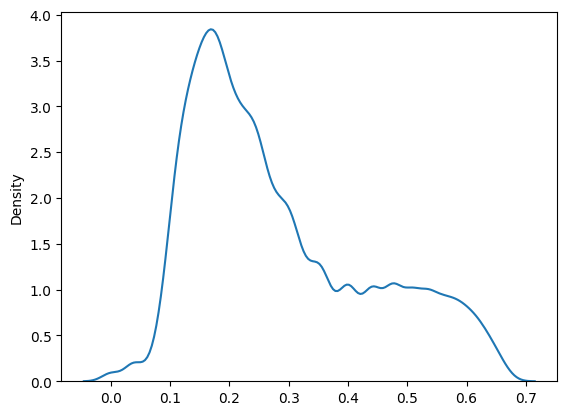

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm


def plot_rho():
    values = []
    for i in tqdm(range(100000)):
        F = gen_F()
        g_l = 1
        values.append(rho_1(F, g_l))
    # add kde plot
    sns.kdeplot(values)


plot_rho()

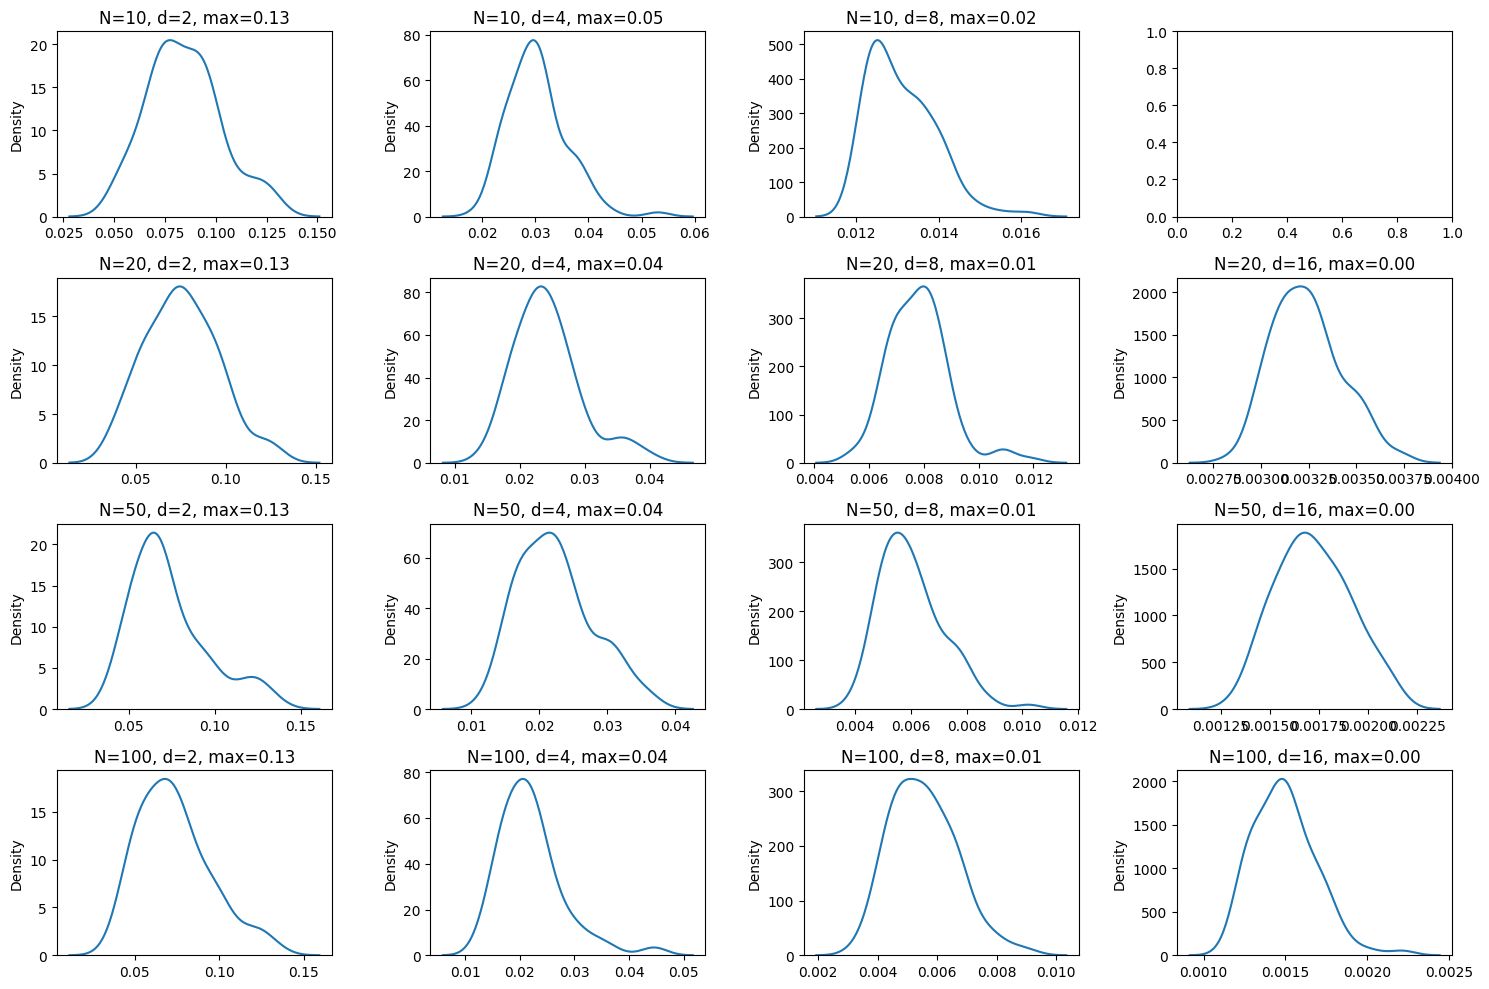

<function matplotlib.pyplot.show(close=None, block=None)>

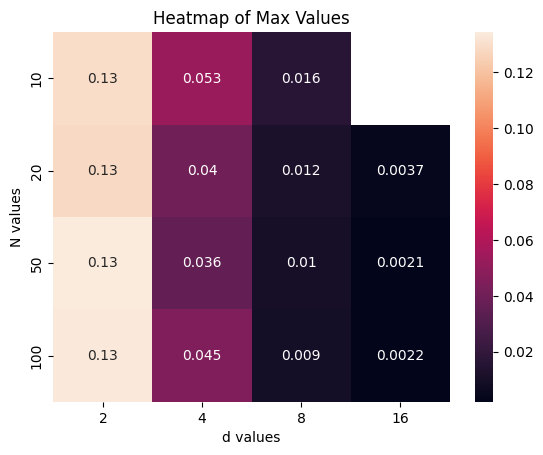

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm


def plot_rho(N, L, d, R, g_l):
    values = []
    for i in range(100):
        F = gen_F_fixed(N, L, d, R)
        values.append(rho_1(F, g_l))
    # add kde plot
    sns.kdeplot(values)
    return values

    # Create a heatmap of the max values


N_values = [10, 20, 50, 100]
d_values = [2, 4, 8, 16]

 

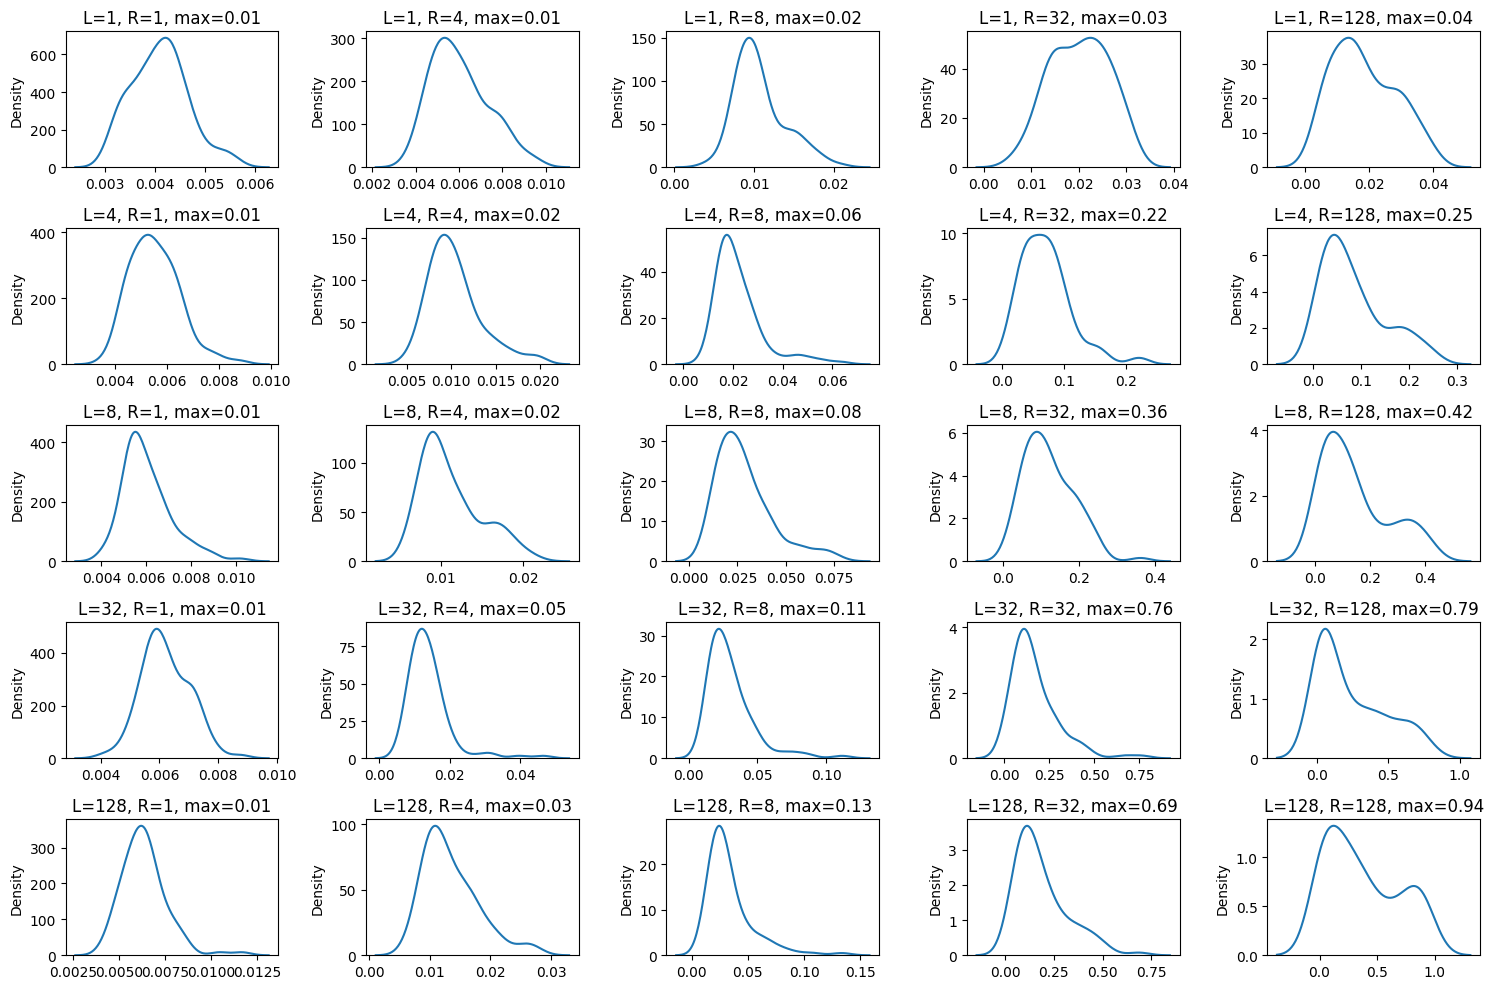

Text(50.722222222222214, 0.5, 'L values')

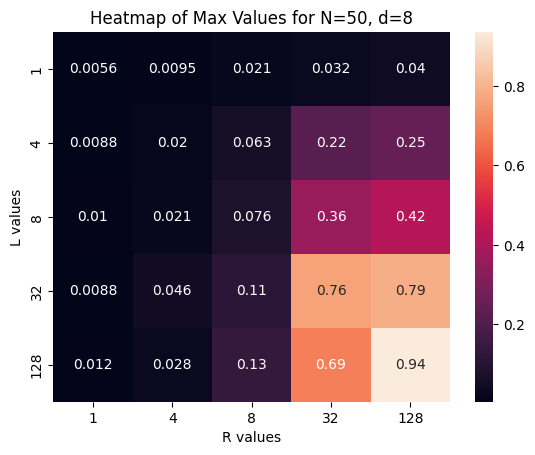

In [ ]:
N = 50
d = 8
L_values = [1, 4, 8, 32, 128]
R_values = [1, 4, 8, 32, 128]


fig, axes = plt.subplots(len(L_values), len(R_values), figsize=(15, 10))


max_values = np.zeros((len(L_values), len(R_values)))


for i, L in enumerate(L_values):
    for j, R in enumerate(R_values):
        plt.sca(axes[i, j])
        values = plot_rho(N, L, d, R, 1.0)
        max_values[i, j] = np.max(values)
        axes[i, j].set_title(f"L={L}, R={R}, max={np.max(values):.2f}")


plt.tight_layout()
plt.show()

sns.heatmap(max_values, annot=True, xticklabels=R_values, yticklabels=L_values)
plt.title("Heatmap of Max Values for N=50, d=8")
plt.xlabel("R values")
plt.ylabel("L values")

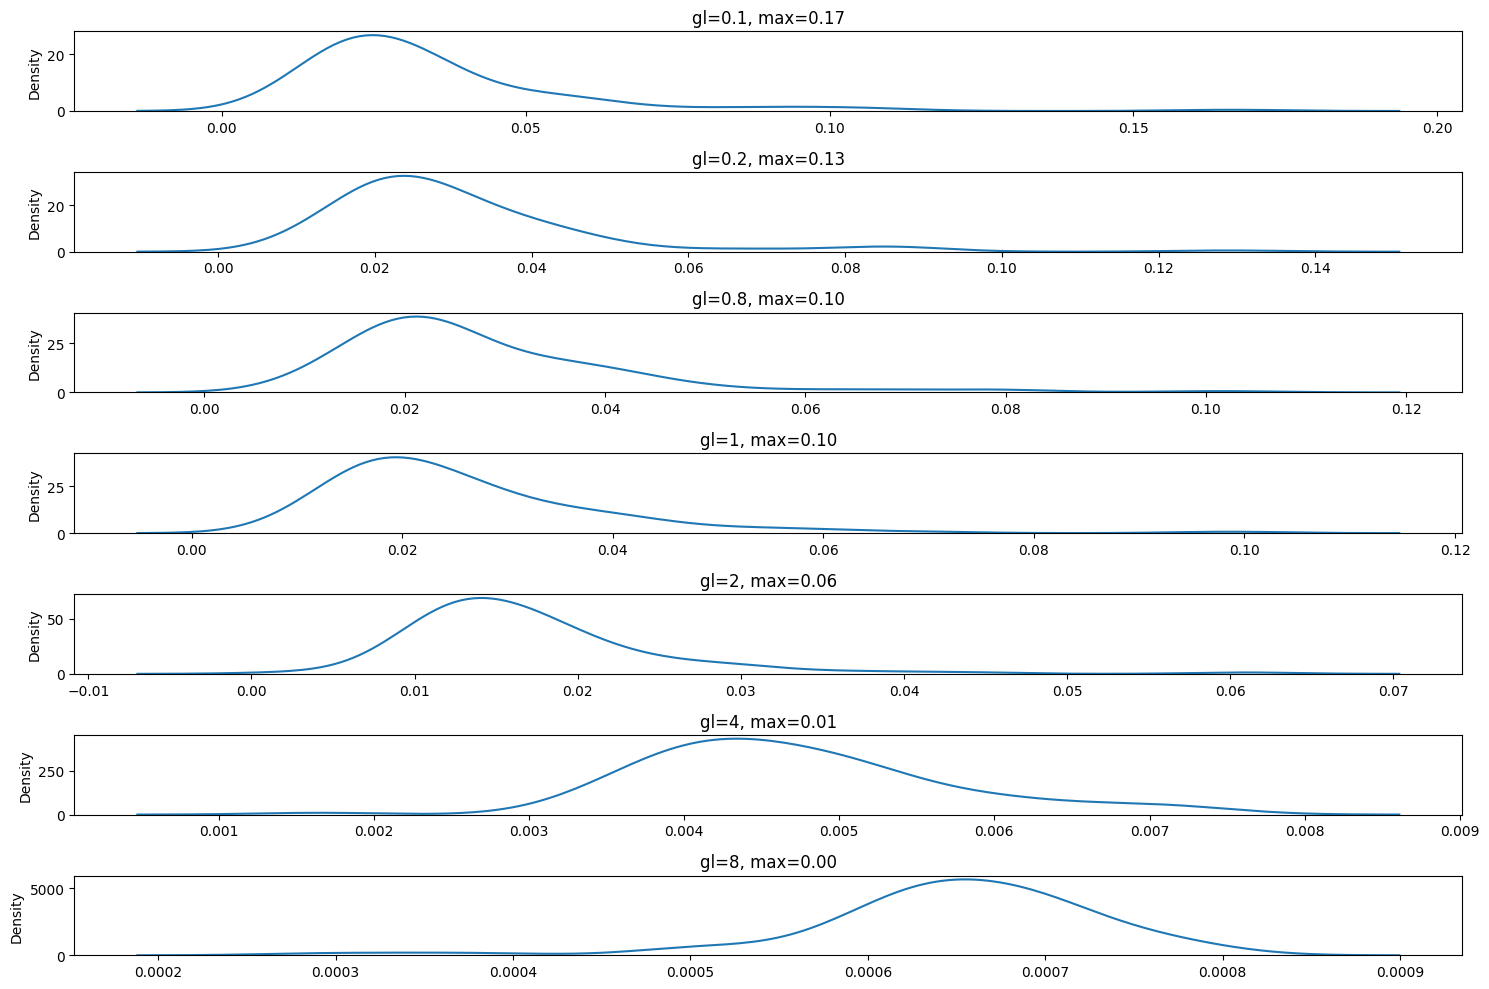

Text(50.722222222222214, 0.5, 'gl values')

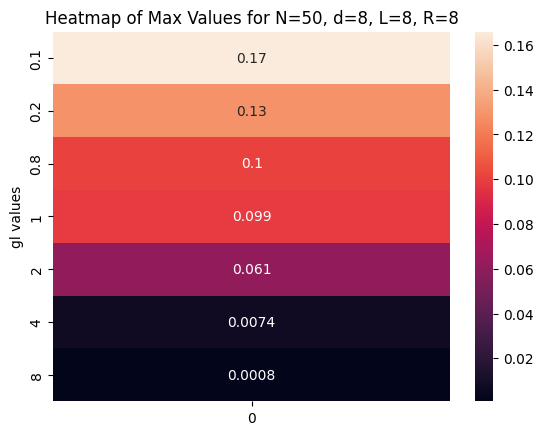

In [81]:
N = 50
d = 8
L = 8
R = 8


gl_values = [0.1, 0.2, 0.8, 1, 2, 4, 8]


fig, axes = plt.subplots(len(gl_values), 1, figsize=(15, 10))


max_values = np.zeros((len(gl_values), 1))


for i, gl in enumerate(gl_values):
    j = 0
    plt.sca(axes[i])
    values = plot_rho(N, L, d, R, gl)
    max_values[i, j] = np.max(values)
    axes[i].set_title(f"gl={gl}, max={np.max(values):.2f}")


plt.tight_layout()
plt.show()

sns.heatmap(max_values, annot=True, yticklabels=gl_values)
plt.title("Heatmap of Max Values for N=50, d=8, L=8, R=8")
plt.ylabel("gl values")